In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
 
# Load dataset 
df = pd.read_csv('house_data.csv') 
 
# Check for non-numeric columns (excluding the target variable 'price') 
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist() 
print(f"Non-numeric columns: {non_numeric_columns}") 
 
# Convert categorical columns to numerical using one-hot encoding 
if non_numeric_columns: 
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True) 
 
# Ensure 'price' column exists 
if 'price' not in df.columns: 
    raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.") 
 
# Define features (X) and target (y) 
X = df.drop(columns=['price'])  # Features (all except target) 
y = df['price']  # Target variable 
 
# Ensure all feature columns are numeric 
if not np.issubdtype(X.dtypes.values[0], np.number): 
    raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.") 
 
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
# Train model 
model = LinearRegression() 
model.fit(X_train, y_train) 
 
# Predictions 
y_pred = model.predict(X_test)       
 
# Evaluate model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
 
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}') 


Non-numeric columns: ['municipality_name', 'object_type_name']
Model Evaluation:
MSE: 149210817252.17, R-squared: 0.49


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
 
# Load dataset (Replace 'salary_data.csv' with an actual dataset) 
df = pd.read_csv('salary_data.csv') 
 
# Preprocess data 
df.dropna(inplace=True) 
 
# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location'] 
existing_categorical_columns = [col for col in categorical_columns if col in df.columns] 
 
# Apply one-hot encoding only if columns exist 
if existing_categorical_columns: 
    df = pd.get_dummies(df, columns=existing_categorical_columns, 
drop_first=True) 
 
# Define features and target variable 
if 'Salary' in df.columns: 
    X = df.drop(columns=['Salary']) 
    y = df['Salary'] 
     
    # Split dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42) 
 
    # Train model 
    model = LinearRegression() 
    model.fit(X_train, y_train) 
 
    # Predictions 
    y_pred = model.predict(X_test) 
 
    # Evaluate model 
    mse = mean_squared_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred) 
 
    print(f'MSE: {mse}, R-squared: {r2}') 
 
    # Example prediction 
    sample_input = X_test.iloc[[0]]  # Keep feature names 
    predicted_salary = model.predict(sample_input) 
    print(f'Predicted Salary for sample input: {predicted_salary[0]}') 
 
else: 
    print("Error: The 'Salary' column is missing from the dataset.") 


MSE: 49830096.85590839, R-squared: 0.9024461774180497
Predicted Salary for sample input: 115790.21011287419


/Users/maheen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-03-14 21:55:30.680 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


MSE: 259.8381705213631, R-squared: 0.845654026823011


2025-03-14 21:55:31.369 
  command:

    streamlit run /Users/maheen/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-03-14 21:55:31.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:31.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:31.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:31.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:31.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:32.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 21:55:34.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignore

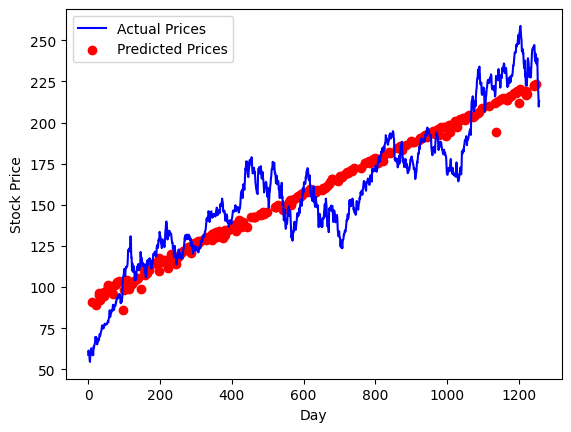

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import streamlit as st 
 
# Fetch stock data 
def get_stock_data(ticker): 
    stock = yf.Ticker(ticker) 
    df = stock.history(period='5y') 
    df = df[['Close', 'Volume']].dropna() 
    df['Day'] = np.arange(len(df)) 
    return df 
 
# Load dataset 
ticker = 'AAPL'  # Example stock symbol 
df = get_stock_data(ticker) 
 
# Define features and target variable 
X = df[['Day', 'Volume']] 
y = df['Close'] 
 
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42) 
 
# Train model 
model = LinearRegression() 
model.fit(X_train, y_train) 
 
# Predictions 
y_pred = model.predict(X_test) 
 
# Evaluate model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
 
print(f'MSE: {mse}, R-squared: {r2}') 
 
# Streamlit app for visualization 
st.title('Stock Price Trend Prediction') 
st.write(f'Stock: {ticker}') 
 
fig, ax = plt.subplots() 
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue') 
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red') 
ax.set_xlabel('Day') 
ax.set_ylabel('Stock Price') 
ax.legend() 
st.pyplot(fig) 
#  Prediction function 
def predict_stock_price(day, volume): 
    input_data = np.array([day, volume]).reshape(1, -1) 
    return model.predict(input_data)[0] 
 
# User input for prediction 
st.sidebar.header('Predict Future Stock Price') 
day = st.sidebar.number_input('Enter Future Day:', 
min_value=int(df['Day'].min()), max_value=int(df['Day'].max())+30) 
volume = st.sidebar.number_input('Enter Expected Volume:', 
min_value=int(df['Volume'].min()), max_value=int(df['Volume'].max())) 
 
if st.sidebar.button('Predict'): 
    prediction = predict_stock_price(day, volume) 
    st.sidebar.write(f'Predicted Stock Price: ${prediction:.2f}') 

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import streamlit as st
from imblearn.over_sampling import SMOTE  # For handling imbalanced data

# Load dataset
file_path = 'customer_churn_data.csv'  # Update the correct path if needed
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit()

# Display dataset columns
print("Columns in dataset:", df.columns)

# Check if 'churn' column exists (handle variations like 'Churn Status')
possible_churn_names = ['churn', 'Churn', 'Churn_Status', 'customer_churn']
churn_col = None
for col in possible_churn_names:
    if col in df.columns:
        churn_col = col
        break

if churn_col is None:
    print("Error: 'churn' column not found in dataset.")
    print("Available columns:", df.columns)
    exit()

# Convert 'churn' column to integers
df[churn_col] = df[churn_col].astype(str).str.strip().map({'False': 0, 'True': 1, 'No': 0, 'Yes': 1})

# Drop unnecessary columns if they exist
drop_cols = ['Id', 'state', 'phone_number']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Convert categorical columns to numerical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target variable
X = df.drop(columns=[churn_col])
y = df[churn_col]

# Check class distribution (imbalanced dataset)
print("Class distribution:\n", y.value_counts())

# Apply SMOTE to balance data if needed
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model (with class balancing)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f'Accuracy: {accuracy:.2f}\n')
print(report)

# Streamlit app for visualization
st.title('Customer Churn Prediction')
st.write(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix Visualization
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

# User input for prediction
st.sidebar.header('Predict Customer Churn')
features = {col: st.sidebar.number_input(f'Enter {col}:', float(X[col].min()), float(X[col].max())) for col in X.columns}

if st.sidebar.button('Predict'):
    input_data = np.array([features[col] for col in X.columns]).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    st.sidebar.write(f'Predicted Churn: {"Yes" if prediction == 1 else "No"}')


Dataset loaded successfully!
Columns in dataset: Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Class distribution:
 Churn
0    572
1     95
Name: count, dtype: int64


/Users/maheen/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/maheen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025-03-14 22:35:38.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:38.365 

Accuracy: 0.86

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       124
           1       0.85      0.86      0.85       105

    accuracy                           0.86       229
   macro avg       0.86      0.86      0.86       229
weighted avg       0.86      0.86      0.86       229



2025-03-14 22:35:38.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:35:39.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import streamlit as st 
 
# Load dataset 
file_path = "owid-energy-data.csv" 
df = pd.read_csv(file_path)
# Display column names to check the correct column name for energy consumption 
st.write("Dataset Columns:", df.columns.tolist()) 
 
# Identify the correct column for energy consumption 
energy_columns = [col for col in df.columns if "consumption" in col.lower()] 
if not energy_columns: 
    raise KeyError("No column related to energy consumption found in the dataset.") 
 
# Use the first identified energy consumption column 
energy_column = energy_columns[0] 
st.write(f"Using '{energy_column}' as the target variable.") 
 
# Preprocess data 
df.dropna(inplace=True) 
 
# One-hot encode categorical variables 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist() 
if categorical_cols: 
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) 
 
# Define features and target variable 
X = df.drop(columns=[energy_column]) 
y = df[energy_column] 
 
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42) 
 
# Train model 
model = LinearRegression() 
model.fit(X_train, y_train) 
 
# Predictions 
y_pred = model.predict(X_test) 
 
# Evaluate model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
 
# Streamlit app 
st.title('Energy Consumption Prediction') 
st.write(f'MSE: {mse:.2f}, R-squared: {r2:.2f}') 
 
# Visualization 
fig, ax = plt.subplots() 
ax.scatter(y_test, y_pred, alpha=0.5, color='blue') 
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', 
lw=2) 
ax.set_xlabel('Actual Energy Consumption') 
ax.set_ylabel('Predicted Energy Consumption') 
st.pyplot(fig) 
 
# User input for prediction 
st.sidebar.header('Predict Energy Consumption') 
features = {col: st.sidebar.number_input(f'Enter {col}:', 
float(df[col].min()), float(df[col].max())) for col in X.columns} 
 
if st.sidebar.button('Predict'): 
    input_data = np.array([features[col] for col in X.columns]).reshape(1, -1) 
    prediction = model.predict(input_data)[0] 
    st.sidebar.write(f'Predicted Energy Consumption: {prediction:.2f} kWh')

2025-03-14 22:00:03.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.363 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.385 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 22:00:03.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar